In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pvlib

data = pd.read_csv('InsolightMay2019.csv', index_col='Date Time', parse_dates=True, encoding='latin1')
data.index = data.index.tz_localize('Europe/Madrid')

data = data.rename(columns={
    'DNI (W/m2)':'dni',
    'DII (W/m2)':'dii',
    'GII (W/m2)':'gii',
    'T_Amb (°C)':'temp_air',
    'Wind Speed (m/s)':'wind_speed',
    'T_Backplane (°C)':'temp_cell',
    'ISC_measured_IIIV (A)':'isc_35',
    'ISC_measured_Si (A)':'isc_si',
    })

In [18]:
location = pvlib.location.Location(latitude=40.4, longitude=-3.7, altitude=695, tz='Europe/Madrid')

solar_zenith = location.get_solarposition(data.index).zenith
solar_azimuth = location.get_solarposition(data.index).azimuth

data['aoi'] = pvlib.irradiance.aoi(surface_tilt=30, surface_azimuth=180,
                                   solar_zenith=solar_zenith, solar_azimuth=solar_azimuth)

In [19]:
# filtro 3 días soleados
data = data['2019-05-30':'2019-06-01']

In [20]:
data['isc35/dii'] = data['isc_35'] / data['dii']
isc35_dii_max = data['isc35/dii'][data.aoi<55].max()

# Normaliza por el máximo
data['isc35/dii'] /= isc35_dii_max

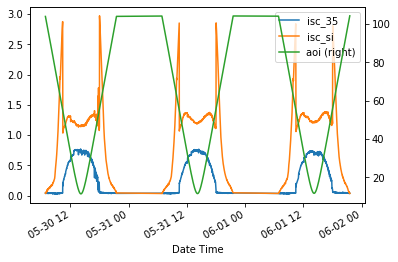

In [21]:
#%% Plot isc, aoi
data[['isc_35', 'isc_si', 'aoi']].plot(secondary_y='aoi')

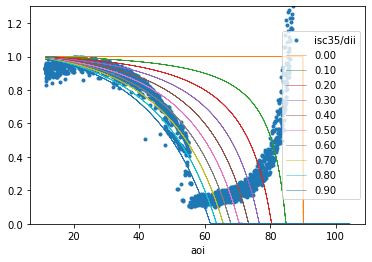

In [22]:
#%% Plots IAM - ASHRAE
data.plot(x='aoi', y='isc35/dii', style='.', ylim=[0, 1.3])
# data.plot(x='aoi', y='isc_si/dii', style='.', ylim=[0, 0.01])

for var in np.arange(start=0, stop=1, step=0.1):
    plt.plot(data['aoi'], pvlib.iam.ashrae(data['aoi'], b=var), label="{0:.2f}".format(var), linewidth=0.5)

plt.legend()

## Isc/DII vs AOI - Fig3-42 TFG_Marcos
AOI umbral en 80º?

![title](Isc_DIIvsAOI-Fig3-42-TFG_Marcos.jpg)

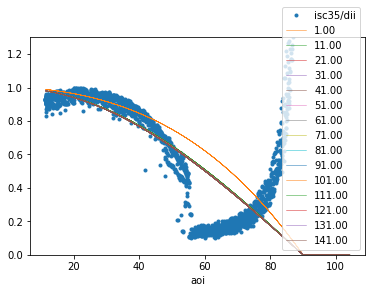

In [23]:
#%% Plots IAM - Martin Ruiz
data.plot(x='aoi', y='isc35/dii', style='.', ylim=[0, 1.3])
# data.plot(x='aoi', y='isc_si/dii', style='.', ylim=[0, 0.01])

for var in np.arange(start=1, stop=150, step=10):
    plt.plot(data['aoi'], pvlib.iam.martin_ruiz(data['aoi'], a_r=var), label="{0:.2f}".format(var), linewidth=0.5)

plt.legend()